In [1]:
# change dir to root
import os
import sys
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 15


In [2]:
tournaments = [   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        'past-hamburg-2023-atp-singles',
                                          'past-bastad-2023-atp-singles',
                                          'past-gstaad-2023-atp-singles', ###
                                          'past-newport-2023-atp-singles',
                                          'past-umag-2023-atp-singles',
                                          'past-atlanta-2023-atp-singles',
                                          'past-washington-2023-atp-singles',
                                          'past-cincinnati-2023-atp-singles',
                                          'past-winston-salem-2023-atp-singles',
                                          'past-us-open-2023-atp-singles', ###
                                          'past-chengdu-2023-atp-singles',
                                          'past-zhuhai-2023-atp-singles', ###
                                          'past-tokyo-2023-atp-singles',
                                          'past-beijing-2023-atp-singles', ###
                                          'past-shanghai-2023-atp-singles',
                                          'past-stockholm-2023-atp-singles',
                                          'past-antwerp-2023-atp-singles', ###
                                          'past-vienna-2023-atp-singles',
                                          'past-basel-2023-atp-singles',
                                          'past-paris-2023-atp-singles',
                                          'past-metz-2023-atp-singles',
                                          'past-finals-turin-2023-atp-singles',
                                          'past-stuttgart-atp-singles',
                                          'past-hertogenbosch-atp-singles',
                                          'past-halle-atp-singles',
                                          'past-london-atp-singles',
                                     ]

tennis_dataset = TennisMatchDataset(tournaments)

Loading data for tournaments {'past-geneva-2023-atp-singles', 'past-dallas-atp-singles', 'past-estoril-2023-atp-singles', 'past-madrid-2023-atp-singles', 'past-madrid-atp-singles', 'past-australian-open-atp-singles', 'past-london-atp-singles', 'past-acapulco-atp-singles', 'past-shanghai-2023-atp-singles', 'past-doha-atp-singles', 'past-cordoba-2023-atp-singles', 'past-marseille-atp-singles', 'past-hamburg-2023-atp-singles', 'past-zhuhai-2023-atp-singles', 'past-wimbledon-2023-atp-singles', 'past-antwerp-2023-atp-singles', 'past-geneva-atp-singles', 'past-winston-salem-2023-atp-singles', 'past-newport-2023-atp-singles', 'past-lyon-atp-singles', 'past-rio-de-janeiro-2023-atp-singles', 'past-london-2023-atp-singles', 'past-stuttgart-atp-singles', 'past-munich-atp-singles', 'past-marrakech-2023-atp-singles', 'past-dubai-atp-singles', 'past-munich-2023-atp-singles', 'past-atlanta-2023-atp-singles', 'past-houston-atp-singles', 'past-bucharest-atp-singles', 'past-brisbane-atp-singles', 'past-

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


Error 'wb32' for match jZjvE2pe in tournament past-geneva-2023-atp-singles
Error 'i305' for match SQnhfZEQ in tournament past-geneva-2023-atp-singles
Error 'w09g' for match S6Ynihjl in tournament past-geneva-2023-atp-singles
Error 'z419' for match xnLpxVBf in tournament past-geneva-2023-atp-singles
Error 'i305' for match zVfW6Ct5 in tournament past-geneva-2023-atp-singles
Error 'wb32' for match xCnIsOjH in tournament past-geneva-2023-atp-singles
Error 'da31' for match AuawJFA8 in tournament past-geneva-2023-atp-singles
Error 'ta12' for match WhtSzvA6 in tournament past-geneva-2023-atp-singles
Error 'pc11' for match bqdjcYmk in tournament past-geneva-2023-atp-singles
Error 'sp80' for match QFuWZcPC in tournament past-geneva-2023-atp-singles
Error 'wb32' for match dxBefWX7 in tournament past-geneva-2023-atp-singles
Error 'r0fp' for match IkxOyKf0 in tournament past-geneva-2023-atp-singles
Error 'kb05' for match S05K2fQR in tournament past-geneva-2023-atp-singles
Error 'z419' for match 46

  3%|▎         | 3/86 [00:00<00:03, 22.51it/s]

Error 'hb64' for match n16R2h72 in tournament past-estoril-2023-atp-singles
Error 'z419' for match Uc5EBwc3 in tournament past-estoril-2023-atp-singles
Error 'cf01' for match GEaJpmR5 in tournament past-estoril-2023-atp-singles
Error 'hb64' for match 0SMqRpIn in tournament past-estoril-2023-atp-singles
Error 'z419' for match SvGLcJFp in tournament past-estoril-2023-atp-singles
Error 'tb69' for match QRFVm0L8 in tournament past-estoril-2023-atp-singles
Error 'r09x' for match Q9Kvmh5I in tournament past-estoril-2023-atp-singles
Error 'v0dz' for match AJXrQdT1 in tournament past-estoril-2023-atp-singles
Error 'sh90' for match GI5vOpWk in tournament past-estoril-2023-atp-singles
Error 'cg04' for match tjlLDTXP in tournament past-estoril-2023-atp-singles
Error 'cf01' for match lAMI1ePu in tournament past-estoril-2023-atp-singles
Error 'hb64' for match QaBLTfQR in tournament past-estoril-2023-atp-singles
Error 'z0a1' for match dlo0MCI1 in tournament past-estoril-2023-atp-singles
Error 'r09x'

  3%|▎         | 3/86 [00:00<00:03, 22.51it/s]

Error 'kb95' for match Wf5EVezI in tournament past-madrid-2023-atp-singles
Error 'va08' for match 0SfcTWZa in tournament past-madrid-2023-atp-singles
Error 'kb05' for match 2FDcZwyg in tournament past-madrid-2023-atp-singles
Error 'cf01' for match riOWCBkJ in tournament past-madrid-2023-atp-singles
Error 's0nv' for match 2ThWmwjn in tournament past-madrid-2023-atp-singles
Error 'gd64' for match lWaJUFkO in tournament past-madrid-2023-atp-singles
Error 'wb08' for match 8YVJFD50 in tournament past-madrid-2023-atp-singles
Error 'r09x' for match EcHGGgjf in tournament past-madrid-2023-atp-singles
Error 'e831' for match bs76XH55 in tournament past-madrid-2023-atp-singles
Error 'w09g' for match rip2Sjk6 in tournament past-madrid-2023-atp-singles
Error 'l0il' for match pC6DPT7R in tournament past-madrid-2023-atp-singles
Error 'gh92' for match dfCEyeSJ in tournament past-madrid-2023-atp-singles
Error 'kd46' for match nLhuLmGr in tournament past-madrid-2023-atp-singles
Error 'pd31' for match zo

Error 'n409' for match f7avEG84 in tournament past-madrid-atp-singles
Error 'n409' for match YL8woeJs in tournament past-madrid-atp-singles
Error 'su55' for match MVUynCX9 in tournament past-madrid-atp-singles
Error 'f0fv' for match l6fvbF6m in tournament past-madrid-atp-singles
Error 'n409' for match 0x4OxqyH in tournament past-madrid-atp-singles
Error 'cg04' for match lrpi2iO9 in tournament past-madrid-atp-singles
Error 'm0jf' for match ptKKgocB in tournament past-madrid-atp-singles
Error 'ph71' for match SxagrzR0 in tournament past-madrid-atp-singles
Error 'cg80' for match t03u8V8E in tournament past-madrid-atp-singles
Error 'v812' for match QRy2B4F6 in tournament past-madrid-atp-singles
Error 'v0dz' for match nquqa6k3 in tournament past-madrid-atp-singles
Error 'su55' for match zBrli9QE in tournament past-madrid-atp-singles
Error 's0re' for match K833nUXG in tournament past-madrid-atp-singles
Error 'bf23' for match WUsK0m1l in tournament past-madrid-atp-singles
Error 'ki63' for mat

  3%|▎         | 3/86 [00:00<00:03, 22.51it/s]

Error 'bu70' for match bN4xCFvm in tournament past-madrid-atp-singles
Error 'pf39' for match 8v1jFuid in tournament past-madrid-atp-singles
Error 'gb88' for match YLn8227j in tournament past-madrid-atp-singles
Error 'm0ea' for match KjYJOhOh in tournament past-madrid-atp-singles
Error 'm0tb' for match zogxwqq3 in tournament past-madrid-atp-singles
Error 'z0a1' for match MHqCkMS8 in tournament past-madrid-atp-singles
Error 'c0h0' for match QqFxhh09 in tournament past-australian-open-atp-singles
Error 's0re' for match UHFht7EB in tournament past-australian-open-atp-singles
Error 'c0h0' for match nuufdmuj in tournament past-australian-open-atp-singles
Error 'v0dz' for match S6rdZV8d in tournament past-australian-open-atp-singles
Error 'gf95' for match GEws2myO in tournament past-australian-open-atp-singles
Error 'c0h0' for match xOYPz8AL in tournament past-australian-open-atp-singles
Error 'kd46' for match prXmY2Js in tournament past-australian-open-atp-singles
Error 's0re' for match OvDu

Error 'wb08' for match Qym6TJY1 in tournament past-australian-open-atp-singles
Error 'j553' for match hQ37nLq2 in tournament past-australian-open-atp-singles
Error 'r975' for match vuylh3B2 in tournament past-australian-open-atp-singles
Error 'gf95' for match 0WQY2tUr in tournament past-australian-open-atp-singles
Error 'gb88' for match UsmjB4M2 in tournament past-australian-open-atp-singles
Error 'h997' for match voUp5qjp in tournament past-australian-open-atp-singles
Error 'mc10' for match IyTl435j in tournament past-australian-open-atp-singles
Error 'su55' for match bNv77MLR in tournament past-australian-open-atp-singles
Error 'd994' for match zXDmP4sG in tournament past-australian-open-atp-singles
Error 'w367' for match j5FKHMZk in tournament past-australian-open-atp-singles
Error 'pg94' for match hjD8OXj5 in tournament past-australian-open-atp-singles
Error 'lb66' for match hUaJxOBF in tournament past-australian-open-atp-singles
Error 'a0gc' for match MRndkNaq in tournament past-a

  7%|▋         | 6/86 [00:00<00:10,  7.80it/s]

Error 's0ia' for match GdSqj8bh in tournament past-australian-open-atp-singles
Error 'va70' for match hzZITgbk in tournament past-australian-open-atp-singles
Error 'gb88' for match IJ7zUNtc in tournament past-australian-open-atp-singles
Error 'm0jz' for match 8ld0Azzr in tournament past-australian-open-atp-singles
Error 'o0a2' for match AyRFrnnO in tournament past-australian-open-atp-singles
Error 'y171' for match vgUBSZeQ in tournament past-australian-open-atp-singles
Error 'bs86' for match Q9GaTfPM in tournament past-australian-open-atp-singles
Error 'l0gh' for match dYrsa7W4 in tournament past-australian-open-atp-singles
Error 'mw18' for match xOS7p8HB in tournament past-australian-open-atp-singles
Error 's0n0' for match ObBZMh2j in tournament past-australian-open-atp-singles
Error 'h09f' for match EmvSSrj9 in tournament past-australian-open-atp-singles
Error 'z09z' for match IqDiVGfA in tournament past-australian-open-atp-singles
Error 'cg94' for match f5f88E4f in tournament past-a

  7%|▋         | 6/86 [00:00<00:10,  7.80it/s]

Error 'hd68' for match jRIkOz6l in tournament past-london-atp-singles
Error 'hd68' for match 0KKNFKNE in tournament past-london-atp-singles
Error 'r975' for match hY30dBed in tournament past-london-atp-singles
Error 'mc10' for match UTZ17Bmo in tournament past-london-atp-singles
Error 'h0bh' for match 4pqUmbmQ in tournament past-london-atp-singles
Error 'mc10' for match naFBIUW0 in tournament past-london-atp-singles
Error 'hd68' for match 8Me9pmmL in tournament past-london-atp-singles
Error 'r975' for match K0FEO5Q1 in tournament past-london-atp-singles
Error 'h0bh' for match hCpCG81D in tournament past-london-atp-singles
Error 'ch12' for match ClLW2YiC in tournament past-london-atp-singles
Error 'v0am' for match M1mMDk6U in tournament past-london-atp-singles
Error 'h0bh' for match I7kDaEWr in tournament past-london-atp-singles
Error 'j0a4' for match 8GEu1CMO in tournament past-london-atp-singles
Error 'kd46' for match bufkLF7t in tournament past-london-atp-singles
Error 'c0h0' for mat

  7%|▋         | 6/86 [00:00<00:10,  7.80it/s]

Error 'hb64' for match EV6hwA0F in tournament past-shanghai-2023-atp-singles
Error 'sm37' for match UZ8I7noB in tournament past-shanghai-2023-atp-singles
Error 'z09z' for match IDYwKCtB in tournament past-shanghai-2023-atp-singles
Error 'k926' for match 0vssxjZq in tournament past-shanghai-2023-atp-singles
Error 'v812' for match fPlMsaRl in tournament past-shanghai-2023-atp-singles
Error 'w09g' for match WMgVZ4U3 in tournament past-shanghai-2023-atp-singles
Error 'wb08' for match W2oJLCXs in tournament past-shanghai-2023-atp-singles
Error 'bk24' for match 6sFKBdP9 in tournament past-shanghai-2023-atp-singles
Error 'gd64' for match je2LGF9j in tournament past-shanghai-2023-atp-singles
Error 'a0gc' for match 8IchjyN6 in tournament past-shanghai-2023-atp-singles
Error 'h0bh' for match 4SNQvYam in tournament past-shanghai-2023-atp-singles
Error 'y09v' for match 08lE4GUf in tournament past-shanghai-2023-atp-singles
Error 's0ia' for match 4x3DtVb9 in tournament past-shanghai-2023-atp-singles

 10%|█         | 9/86 [00:01<00:07,  9.65it/s]

Error 'x01a' for match lEreA8Xc in tournament past-shanghai-2023-atp-singles
Error 'lc54' for match lSNTO7ni in tournament past-shanghai-2023-atp-singles
Error 'd994' for match 6kgjBlIi in tournament past-shanghai-2023-atp-singles
Error 'l0fw' for match CSXGdk3b in tournament past-shanghai-2023-atp-singles
Error 'u134' for match SIMXNR1c in tournament past-shanghai-2023-atp-singles
Error 'd0c3' for match nNqo0O9j in tournament past-shanghai-2023-atp-singles
Error 'j553' for match U3SLe9I4 in tournament past-shanghai-2023-atp-singles
Error 'm0hu' for match zqQuM5W9 in tournament past-shanghai-2023-atp-singles
Error 'pg94' for match YyZCcVmh in tournament past-shanghai-2023-atp-singles
Error 'g628' for match tdqepjsh in tournament past-doha-atp-singles
Error 'gf95' for match nFkdqPEl in tournament past-doha-atp-singles
Error 'mc10' for match zVje3aOA in tournament past-doha-atp-singles
Error 'v812' for match Mi2qIfWL in tournament past-doha-atp-singles
Error 'mc10' for match f56BmCiJ in 

 14%|█▍        | 12/86 [00:01<00:05, 12.53it/s]

Error 'hb64' for match UD7cSa8o in tournament past-marseille-atp-singles
Error 'v0dz' for match E1Xm8dNT in tournament past-marseille-atp-singles
Error 'gb88' for match Wns7UvJa in tournament past-marseille-atp-singles
Error 'gf95' for match SEzGSImC in tournament past-marseille-atp-singles
Error 'su55' for match hdr3VK3g in tournament past-marseille-atp-singles
Error 'c0bc' for match EBWBTbY5 in tournament past-marseille-atp-singles
Error 'mc10' for match OC06Qwwb in tournament past-marseille-atp-singles
Error 'z0a1' for match bR4F08yq in tournament past-marseille-atp-singles
Error 'bk24' for match GAJF3GVp in tournament past-marseille-atp-singles
Error 'bm95' for match tlB1RJNi in tournament past-marseille-atp-singles
Error 'g628' for match dQxq9x8N in tournament past-marseille-atp-singles
Error 'gb88' for match MNpWLqer in tournament past-marseille-atp-singles
Error 'z0a1' for match YH6nV2jn in tournament past-marseille-atp-singles
Error 'gf95' for match tl7XYGGt in tournament past-

 14%|█▍        | 12/86 [00:01<00:05, 12.53it/s]

Error 'n732' for match reKF2lua in tournament past-zhuhai-2023-atp-singles
Error 'n732' for match UTee4uuE in tournament past-zhuhai-2023-atp-singles
Error 'n732' for match ngbtInEQ in tournament past-zhuhai-2023-atp-singles
Error 'kc56' for match xbkopa3C in tournament past-zhuhai-2023-atp-singles
Error 'pg94' for match GfgY25SR in tournament past-zhuhai-2023-atp-singles
Error 'mc10' for match 4IOuBMbL in tournament past-zhuhai-2023-atp-singles
Error 's0gd' for match Qs0wWYbE in tournament past-zhuhai-2023-atp-singles
Error 'bi81' for match p8jAPHJi in tournament past-zhuhai-2023-atp-singles
Error 'cg33' for match 8pxtuGVi in tournament past-zhuhai-2023-atp-singles
Error 'gd64' for match YJ7UDOE2 in tournament past-zhuhai-2023-atp-singles
Error 'n732' for match QkvF29Er in tournament past-zhuhai-2023-atp-singles
Error 's0re' for match tIKYgdGC in tournament past-zhuhai-2023-atp-singles
Error 'h0bh' for match YiLUfx16 in tournament past-zhuhai-2023-atp-singles
Error 'mc10' for match lO

 16%|█▋        | 14/86 [00:01<00:06, 11.89it/s]

Error 'pg94' for match hjoPwpVE in tournament past-zhuhai-2023-atp-singles
Error 'bi81' for match 0pAO17PQ in tournament past-zhuhai-2023-atp-singles
Error 'n679' for match UeUQHSY7 in tournament past-zhuhai-2023-atp-singles
Error 's0ia' for match ClVojTxS in tournament past-zhuhai-2023-atp-singles
Error 'wb36' for match bZSHcvHm in tournament past-zhuhai-2023-atp-singles
Error 'pg94' for match IHOggPP1 in tournament past-zhuhai-2023-atp-singles
Error 's0gv' for match WKCyI822 in tournament past-zhuhai-2023-atp-singles
Error 'ga79' for match f1MQeIo0 in tournament past-zhuhai-2023-atp-singles
Error 's0ia' for match ABBuHSH8 in tournament past-zhuhai-2023-atp-singles
Error 's0kt' for match CxXLdbWg in tournament past-zhuhai-2023-atp-singles
Error 'sq79' for match Sn6pGnXE in tournament past-zhuhai-2023-atp-singles
Error 'n679' for match 4CTDbK1s in tournament past-zhuhai-2023-atp-singles
Error 'su55' for match by85Xmk0 in tournament past-wimbledon-2023-atp-singles
Error 'w367' for match

 16%|█▋        | 14/86 [00:01<00:06, 11.89it/s]

Error 'bs86' for match pKrVVRtB in tournament past-wimbledon-2023-atp-singles
Error 'pf39' for match pdE6ronp in tournament past-wimbledon-2023-atp-singles
Error 'o449' for match 4pTpYd6s in tournament past-wimbledon-2023-atp-singles
Error 'wb08' for match jaEa8ZKb in tournament past-wimbledon-2023-atp-singles
Error 'bo10' for match 8QoqankE in tournament past-wimbledon-2023-atp-singles
Error 'cg33' for match vgpr5KGB in tournament past-wimbledon-2023-atp-singles
Error 'cg94' for match AZmZjqEi in tournament past-wimbledon-2023-atp-singles
Error 'm0jf' for match CUS9OqZp in tournament past-wimbledon-2023-atp-singles
Error 'sy67' for match YeJQikPc in tournament past-wimbledon-2023-atp-singles
Error 'm0g4' for match KCwaV1CQ in tournament past-wimbledon-2023-atp-singles
Error 'p09o' for match 6TqRW7R4 in tournament past-wimbledon-2023-atp-singles
Error 'gf95' for match 6aAcc3w4 in tournament past-wimbledon-2023-atp-singles
Error 'ki63' for match 0IZvKjb2 in tournament past-wimbledon-202

 19%|█▊        | 16/86 [00:01<00:07,  9.24it/s]

Error 'd0c1' for match xMwkUzM9 in tournament past-wimbledon-2023-atp-singles
Error 'r09x' for match 0zTAGHiA in tournament past-wimbledon-2023-atp-singles
Error 'n09u' for match QPlHqabM in tournament past-wimbledon-2023-atp-singles
Error 'a829' for match Cb8YkzLe in tournament past-wimbledon-2023-atp-singles
Error 'gb53' for match hAP2IwNc in tournament past-wimbledon-2023-atp-singles
Error 'c882' for match IeTgg9Rm in tournament past-wimbledon-2023-atp-singles
Error 'lc12' for match Cj8EhjG2 in tournament past-wimbledon-2023-atp-singles
Error 'cg33' for match EPJNITlM in tournament past-wimbledon-2023-atp-singles
Error 'ga36' for match UDoKVq3i in tournament past-wimbledon-2023-atp-singles
Error 'y218' for match pEc6A5d2 in tournament past-wimbledon-2023-atp-singles
Error 'o0a2' for match nZ15mFT0 in tournament past-wimbledon-2023-atp-singles
Error 'mp01' for match OCIcErYG in tournament past-wimbledon-2023-atp-singles
Error 'pf39' for match IwCOVS8k in tournament past-wimbledon-202

 19%|█▊        | 16/86 [00:01<00:07,  9.24it/s]

Error 'mw18' for match SOTvmAvQ in tournament past-geneva-atp-singles
Error 'su55' for match WSMeyXJ5 in tournament past-geneva-atp-singles
Error 'h997' for match vDlonlYN in tournament past-geneva-atp-singles
Error 'gb88' for match fFNF2yv1 in tournament past-geneva-atp-singles
Error 'kc56' for match 0MTBXlJU in tournament past-geneva-atp-singles
Error 'h0bh' for match 8bP74c9l in tournament past-geneva-atp-singles
Error 'ge28' for match zg5p3ikA in tournament past-geneva-atp-singles
Error 'gb88' for match ObgEFtdU in tournament past-geneva-atp-singles
Error 's0nv' for match l60spcQs in tournament past-geneva-atp-singles
Error 'mw18' for match rmhbGCmf in tournament past-geneva-atp-singles
Error 'gb88' for match 6ubp1dfR in tournament past-geneva-atp-singles
Error 'bp41' for match r137Syl2 in tournament past-geneva-atp-singles
Error 'j09f' for match MiOtsy3e in tournament past-geneva-atp-singles
Error 'w09b' for match pQ9y3IPE in tournament past-geneva-atp-singles
Error 'ge28' for mat

 21%|██        | 18/86 [00:01<00:06, 10.69it/s]

Error 'cg80' for match z9curfTo in tournament past-winston-salem-2023-atp-singles
Error 'cg80' for match zyWg468I in tournament past-winston-salem-2023-atp-singles
Error 'ph71' for match hhE3gkf0 in tournament past-winston-salem-2023-atp-singles
Error 'g628' for match hvmVOOWI in tournament past-winston-salem-2023-atp-singles
Error 'cg80' for match MyCJk5WD in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 4tRKU3fl in tournament past-winston-salem-2023-atp-singles
Error 'g628' for match S4ZgzPXu in tournament past-winston-salem-2023-atp-singles
Error 'ph71' for match lx1tBT5K in tournament past-winston-salem-2023-atp-singles
Error 'mp01' for match 8zXBDsRl in tournament past-winston-salem-2023-atp-singles
Error 'k0ee' for match QBs7ENBr in tournament past-winston-salem-2023-atp-singles
Error 'cg80' for match boHKhnYO in tournament past-winston-salem-2023-atp-singles
Error 'kc12' for match raM1GF6k in tournament past-winston-salem-2023-atp-singles
Error 'v0dz' for

 21%|██        | 18/86 [00:01<00:06, 10.69it/s]

Error 'da31' for match OUao1BEl in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r772' for match U5kedWcI in tournament past-rio-de-janeiro-2023-atp-singles
Error 'f510' for match tMSqQfaG in tournament past-rio-de-janeiro-2023-atp-singles
Error 'l0cx' for match hn7fLx5R in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r772' for match EmSehDr9 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'z419' for match jXZWSdFc in tournament past-rio-de-janeiro-2023-atp-singles
Error 'b0gg' for match zTabOuTn in tournament past-rio-de-janeiro-2023-atp-singles
Error 'mv14' for match l2AOppAE in tournament past-rio-de-janeiro-2023-atp-singles
Error 'v09t' for match t60fPLDt in tournament past-rio-de-janeiro-2023-atp-singles
Error 'f510' for match 6LZTanNA in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r772' for match URWy7vbC in tournament past-rio-de-janeiro-2023-atp-singles
Error 'sm37' for match OlWu6bDI in tournament past-rio-de-janeiro-2023-atp-singles
Erro

 28%|██▊       | 24/86 [00:01<00:04, 15.40it/s]

Error 'r09v' for match MPFbjYNf in tournament past-rio-de-janeiro-2023-atp-singles
Error 'bs86' for match buOjKlYS in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r09v' for match Yqg39oAs in tournament past-rio-de-janeiro-2023-atp-singles
Error 'bs86' for match tAdB7Pvf in tournament past-rio-de-janeiro-2023-atp-singles
Error 'mw75' for match OYoG6qf0 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'cf01' for match S6h785Pm in tournament past-rio-de-janeiro-2023-atp-singles
Error 'bf23' for match jPkvF7nK in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 2PpK5396 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'd874' for match Wz7yER1Q in tournament past-rio-de-janeiro-2023-atp-singles
Error 'u182' for match WbkO4NOC in tournament past-rio-de-janeiro-2023-atp-singles
Error 'sm37' for match UVt7dtud in tournament past-london-2023-atp-singles
Error 'ph78' for match 21YIISoU in tournament past-london-2023-atp-singles
Error 'z419' for mat

 28%|██▊       | 24/86 [00:02<00:04, 15.40it/s]

Error 'va08' for match 4UCJM6At in tournament past-marrakech-2023-atp-singles
Error 'l0ck' for match YNq1gu5J in tournament past-marrakech-2023-atp-singles
Error 'bt68' for match IeLXmJSt in tournament past-marrakech-2023-atp-singles
Error 'kc56' for match p8jJUeSI in tournament past-marrakech-2023-atp-singles
Error 'y218' for match jccN2Qt6 in tournament past-marrakech-2023-atp-singles
Error 'gf95' for match b5sv403h in tournament past-marrakech-2023-atp-singles
Error 'bu70' for match notxU8vC in tournament past-marrakech-2023-atp-singles
Error 'bi47' for match QgnBMjcb in tournament past-marrakech-2023-atp-singles
Error 'ki82' for match QTdgLXn0 in tournament past-marrakech-2023-atp-singles
Error 'y218' for match bJCESFfQ in tournament past-marrakech-2023-atp-singles
Error 'v717' for match 4KecKi26 in tournament past-marrakech-2023-atp-singles
Error 'a0ey' for match U13pNgIm in tournament past-marrakech-2023-atp-singles
Error 'p0j3' for match bse1JBHC in tournament past-marrakech-202

 31%|███▏      | 27/86 [00:02<00:03, 17.22it/s]

Error 'c0h0' for match SzE3zAtL in tournament past-dubai-atp-singles
Error 'cg80' for match x0v0lCJ4 in tournament past-dubai-atp-singles
Error 'v0dz' for match dE2STvg0 in tournament past-dubai-atp-singles
Error 'c0h0' for match 6kw5EGBm in tournament past-dubai-atp-singles
Error 's0nv' for match KrWGpUIT in tournament past-dubai-atp-singles
Error 'su55' for match WMaZ2BYc in tournament past-dubai-atp-singles
Error 'v812' for match CIWCoA3N in tournament past-dubai-atp-singles
Error 'g628' for match Yg2hdzyP in tournament past-dubai-atp-singles
Error 'z0a1' for match hGzExf3e in tournament past-dubai-atp-singles
Error 'v0dz' for match nBomiEZo in tournament past-dubai-atp-singles
Error 'pd07' for match hlpsiC1T in tournament past-dubai-atp-singles
Error 'c0bc' for match QNZMezmb in tournament past-dubai-atp-singles
Error 'e0aa' for match 6XsVgEHA in tournament past-dubai-atp-singles
Error 'gf95' for match EcowhhnN in tournament past-dubai-atp-singles
Error 'v0dz' for match O8hQff24 in

 34%|███▎      | 29/86 [00:02<00:03, 17.65it/s]

Error 'kc12' for match MRCC6iw4 in tournament past-houston-atp-singles
Error 'wb32' for match zLR6IpjK in tournament past-houston-atp-singles
Error 'y171' for match 63IxDODs in tournament past-houston-atp-singles
Error 'h09p' for match KCqKfsbD in tournament past-houston-atp-singles
Error 'k0a3' for match naoCd3T0 in tournament past-houston-atp-singles
Error 'va25' for match lS7sCrTm in tournament past-houston-atp-singles
Error 'rg42' for match dUS2JQzE in tournament past-houston-atp-singles
Error 'b0ej' for match tMpGeNr7 in tournament past-houston-atp-singles
Error 'd0f6' for match UsRAH45Q in tournament past-houston-atp-singles
Error 'bk24' for match bDNIeaB7 in tournament past-bucharest-atp-singles
Error 'f0fv' for match Ox2nKQDE in tournament past-bucharest-atp-singles
Error 'bk24' for match 4CLV3vgT in tournament past-bucharest-atp-singles
Error 'bk24' for match tW7QnviJ in tournament past-bucharest-atp-singles
Error 'f0fv' for match OlWFEyjR in tournament past-bucharest-atp-sing

 36%|███▌      | 31/86 [00:02<00:03, 18.16it/s]

Error 'a829' for match tSLXrbYo in tournament past-bucharest-atp-singles
Error 'va25' for match riIluGXA in tournament past-bucharest-atp-singles
Error 'f0fv' for match vFkzVnqJ in tournament past-bucharest-atp-singles
Error 'bm95' for match 2ekFeyIi in tournament past-bucharest-atp-singles
Error 'bk24' for match W6BVVuc5 in tournament past-bucharest-atp-singles
Error 'va25' for match UVdS73p3 in tournament past-bucharest-atp-singles
Error 'a829' for match M1J4GouS in tournament past-bucharest-atp-singles
Error 'te16' for match htKOgRSj in tournament past-bucharest-atp-singles
Error 'ca99' for match 6HXnGJoI in tournament past-bucharest-atp-singles
Error 'va25' for match 6VCWfDCi in tournament past-bucharest-atp-singles
Error 'd923' for match pl453t2C in tournament past-bucharest-atp-singles
Error 'pf39' for match hE7D1KWO in tournament past-bucharest-atp-singles
Error 'bk24' for match SWLeEcGU in tournament past-bucharest-atp-singles
Error 'a829' for match biUvIuH5 in tournament past-

Error 'kd46' for match 4fKVJNmo in tournament past-rome-2023-atp-singles
Error 'j0dg' for match W6eQu5A4 in tournament past-rome-2023-atp-singles
Error 'e831' for match SYS3O3uU in tournament past-rome-2023-atp-singles
Error 'g628' for match 04IWVHu7 in tournament past-rome-2023-atp-singles
Error 'cg04' for match 4xPNXwBf in tournament past-rome-2023-atp-singles
Error 'lb66' for match QkIjyDHn in tournament past-rome-2023-atp-singles
Error 'l0cx' for match rRSoxg2t in tournament past-rome-2023-atp-singles
Error 'kb05' for match IuTRWcQ0 in tournament past-rome-2023-atp-singles
Error 'v0dz' for match WOQFZatr in tournament past-rome-2023-atp-singles
Error 'i305' for match CvpquMIK in tournament past-rome-2023-atp-singles
Error 'n679' for match 86HdUJMh in tournament past-rome-2023-atp-singles
Error 'j0dg' for match 46A3qjSd in tournament past-rome-2023-atp-singles
Error 'ki82' for match K2Q1hoBR in tournament past-rome-2023-atp-singles
Error 'n0am' for match f7m6qMiG in tournament past-

 38%|███▊      | 33/86 [00:02<00:03, 14.74it/s]

Error 'j0dg' for match 4flni9f2 in tournament past-rome-2023-atp-singles
Error 'ph78' for match Q3krhkud in tournament past-rome-2023-atp-singles
Error 'ki82' for match vXb8uCej in tournament past-rome-2023-atp-singles
Error 'n679' for match YVua2Z23 in tournament past-rome-2023-atp-singles
Error 'k0dp' for match hAsUFhX2 in tournament past-rome-2023-atp-singles
Error 'sh90' for match Acf4thtp in tournament past-rome-2023-atp-singles
Error 'n0am' for match KSFPmzlA in tournament past-rome-2023-atp-singles
Error 'bg23' for match Y5A3aXnM in tournament past-rome-2023-atp-singles
Error 'bi47' for match QPIXoEIM in tournament past-rome-2023-atp-singles
Error 'm0if' for match txHLlGY3 in tournament past-rome-2023-atp-singles
Error 'ph64' for match UydZgBAq in tournament past-rome-2023-atp-singles
Error 'ch12' for match O0MGkdJc in tournament past-rome-2023-atp-singles
Error 'kd46' for match 8l8xoYXS in tournament past-rome-2023-atp-singles
Error 'va08' for match INcCvWAd in tournament past-

 38%|███▊      | 33/86 [00:02<00:03, 14.74it/s]

Error 'w09g' for match G6Rp4LPg in tournament past-washington-2023-atp-singles
Error 's0re' for match d2dSJBxU in tournament past-washington-2023-atp-singles
Error 'mc10' for match fk44y1N3 in tournament past-washington-2023-atp-singles
Error 'wb08' for match KQ2mEsMn in tournament past-washington-2023-atp-singles
Error 'mp01' for match UwNnKrt0 in tournament past-washington-2023-atp-singles
Error 's0k7' for match AZuyhmVT in tournament past-washington-2023-atp-singles
Error 'bi23' for match SQhjM3t9 in tournament past-washington-2023-atp-singles
Error 'mc10' for match tflKeVV4 in tournament past-washington-2023-atp-singles
Error 'wb08' for match f56udb9K in tournament past-washington-2023-atp-singles
Error 'bk24' for match zV6NNVZ3 in tournament past-washington-2023-atp-singles
Error 'sy67' for match xIZI5Mfp in tournament past-washington-2023-atp-singles
Error 'a829' for match Wd0WL94G in tournament past-washington-2023-atp-singles
Error 'kd46' for match 6ZrmBrXM in tournament past-w

 44%|████▍     | 38/86 [00:02<00:02, 16.58it/s]

Error 's0re' for match KfMJj0Gr in tournament past-washington-2023-atp-singles
Error 'f811' for match xWQUB7a1 in tournament past-washington-2023-atp-singles
Error 'a829' for match bHX5lZ7L in tournament past-washington-2023-atp-singles
Error 'm0hu' for match nsYHE9Fr in tournament past-washington-2023-atp-singles
Error 'sm37' for match hvX9mgNR in tournament past-washington-2023-atp-singles
Error 'bi23' for match CODtrXpk in tournament past-washington-2023-atp-singles
Error 'kc56' for match xY5lWyoG in tournament past-washington-2023-atp-singles
Error 'ka98' for match t4XLDTUl in tournament past-washington-2023-atp-singles
Error 'wb08' for match AeiBSio2 in tournament past-washington-2023-atp-singles
Error 'c0bc' for match CAY7TXVe in tournament past-washington-2023-atp-singles
Error 'lb66' for match jepaVg1q in tournament past-washington-2023-atp-singles
Error 's0re' for match KfWPCmpe in tournament past-washington-2023-atp-singles
Error 'gk06' for match 6y2PSBh7 in tournament past-w

 44%|████▍     | 38/86 [00:02<00:02, 16.58it/s]

Error 's0re' for match Sl7xHpHt in tournament past-barcelona-atp-singles
Error 'n732' for match zVzIuUwe in tournament past-barcelona-atp-singles
Error 'cg80' for match b3hWQ01t in tournament past-barcelona-atp-singles
Error 'gf95' for match UguC0PWa in tournament past-barcelona-atp-singles
Error 'sm37' for match dUbgD2G5 in tournament past-barcelona-atp-singles
Error 'v0dz' for match 2HxAsj9r in tournament past-barcelona-atp-singles
Error 'r772' for match IDh8johD in tournament past-barcelona-atp-singles
Error 'h0a4' for match bZWSdsWO in tournament past-barcelona-atp-singles
Error 'm0g4' for match OG0oFOog in tournament past-barcelona-atp-singles
Error 'a0cj' for match xKrKb31C in tournament past-barcelona-atp-singles
Error 'c0h0' for match lY0ifThl in tournament past-barcelona-atp-singles
Error 'r0fp' for match ddcmElpK in tournament past-barcelona-atp-singles
Error 'sm37' for match ldcL7SX9 in tournament past-barcelona-atp-singles
Error 'm0g4' for match KrCpVnCi in tournament past-

 44%|████▍     | 38/86 [00:03<00:02, 16.58it/s]

Error 'z419' for match zwJ0zIkn in tournament past-barcelona-atp-singles
Error 'a09u' for match ILzioZ34 in tournament past-barcelona-atp-singles
Error 'bf23' for match 4IAHWZlB in tournament past-barcelona-atp-singles
Error 'ta29' for match KCTiGE4U in tournament past-barcelona-atp-singles
Error 'a0cj' for match ULVWyVQj in tournament past-barcelona-atp-singles
Error 'mw76' for match EmUaqDYG in tournament past-barcelona-atp-singles
Error 'rb60' for match UafdPiso in tournament past-barcelona-atp-singles
Error 's0re' for match bcuqIzzI in tournament past-barcelona-atp-singles
Error 'n732' for match 8feiyENg in tournament past-french-open-2023-atp-singles
Error 'l0cx' for match 0hr4Lhxo in tournament past-french-open-2023-atp-singles
Error 'k0cz' for match UmdQhdqr in tournament past-french-open-2023-atp-singles
Error 'cg80' for match pdEXyQn7 in tournament past-french-open-2023-atp-singles
Error 'n732' for match f3oXJ6qC in tournament past-french-open-2023-atp-singles
Error 'su55' for

 44%|████▍     | 38/86 [00:03<00:02, 16.58it/s]

Error 'f510' for match vBgQBLXd in tournament past-french-open-2023-atp-singles
Error 'h997' for match YLCZrawr in tournament past-french-open-2023-atp-singles
Error 's0gr' for match vaVH0qHs in tournament past-french-open-2023-atp-singles
Error 'mp01' for match hh0ErhTd in tournament past-french-open-2023-atp-singles
Error 'g628' for match EsJkOrW6 in tournament past-french-open-2023-atp-singles
Error 'hb64' for match Qo8SKlyj in tournament past-french-open-2023-atp-singles
Error 'bk24' for match E7lNtWc9 in tournament past-french-open-2023-atp-singles
Error 'z0a1' for match Mm4DYQXl in tournament past-french-open-2023-atp-singles
Error 'hg86' for match CvSiRjbM in tournament past-french-open-2023-atp-singles
Error 'mv14' for match fT0maYET in tournament past-french-open-2023-atp-singles
Error 'k0cz' for match 8zuUtkQ8 in tournament past-french-open-2023-atp-singles
Error 'ph71' for match YDCv1fpH in tournament past-french-open-2023-atp-singles
Error 'va08' for match I94PJONJ in tourn

 44%|████▍     | 38/86 [00:03<00:02, 16.58it/s]

Error 'g0a0' for match hxCjTCT9 in tournament past-french-open-2023-atp-singles
Error 'm0jf' for match rHXfo4Hf in tournament past-french-open-2023-atp-singles
Error 'tb69' for match phtcJy0o in tournament past-french-open-2023-atp-singles
Error 'cg80' for match bejZwUsS in tournament past-french-open-2023-atp-singles
Error 'v812' for match G4nCAKp6 in tournament past-french-open-2023-atp-singles
Error 'w367' for match 0vgG9qHD in tournament past-french-open-2023-atp-singles
Error 'f510' for match KAY9GZq4 in tournament past-french-open-2023-atp-singles
Error 'wb32' for match Oru1IeFi in tournament past-french-open-2023-atp-singles
Error 'kc56' for match tUnrJoY1 in tournament past-french-open-2023-atp-singles
Error 'i305' for match CIjHEDEG in tournament past-french-open-2023-atp-singles
Error 'su55' for match QmDz2zVA in tournament past-french-open-2023-atp-singles
Error 'pd31' for match 6L9vWEqi in tournament past-french-open-2023-atp-singles
Error 's0re' for match OClCgS9E in tourn

 47%|████▋     | 40/86 [00:03<00:04,  9.62it/s]

Error 'h09p' for match IyBGWtWn in tournament past-french-open-2023-atp-singles
Error 'ga36' for match bTJNtfiA in tournament past-french-open-2023-atp-singles
Error 's0re' for match E913qQEa in tournament past-french-open-2023-atp-singles
Error 'tc01' for match 06yUUQa6 in tournament past-french-open-2023-atp-singles
Error 'bf23' for match 00GBXMGt in tournament past-french-open-2023-atp-singles
Error 'a09t' for match 4hDSTvG5 in tournament past-french-open-2023-atp-singles
Error 'cg33' for match rPqoH1Wa in tournament past-french-open-2023-atp-singles
Error 'd0c3' for match 4YpsIsHg in tournament past-french-open-2023-atp-singles
Error 'o0a2' for match 2Zcap6ag in tournament past-french-open-2023-atp-singles
Error 's0la' for match 4bfGtObI in tournament past-french-open-2023-atp-singles
Error 's0gd' for match dWaWnaLi in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match ULainSUt in tournament past-french-open-2023-atp-singles
Error 'bo10' for match j5cd4pTq in tourn

 50%|█████     | 43/86 [00:03<00:03, 11.88it/s]

Error 'r975' for match 6XaaXDMr in tournament past-hertogenbosch-atp-singles
Error 'bo10' for match z9gd2O7s in tournament past-hertogenbosch-atp-singles
Error 's0gr' for match bTs4ABLt in tournament past-hertogenbosch-atp-singles
Error 's0n0' for match p8f62hcU in tournament past-hertogenbosch-atp-singles
Error 'h0bh' for match IeRjnicR in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match Oh6c4ESH in tournament past-hertogenbosch-atp-singles
Error 'ph71' for match 0fguUiyq in tournament past-hertogenbosch-atp-singles
Error 'r975' for match Od6Vv9k1 in tournament past-hertogenbosch-atp-singles
Error 'c0h0' for match SUCMtVKl in tournament past-hertogenbosch-atp-singles
Error 'v812' for match 8My7n0iA in tournament past-hertogenbosch-atp-singles
Error 'bo10' for match YuBq2u9O in tournament past-hertogenbosch-atp-singles
Error 'n679' for match 2LvL6TK5 in tournament past-hertogenbosch-atp-singles
Error 'gb88' for match UZpdQ9z8 in tournament past-hertogenbosch-atp-singles

Error 'bm95' for match WIeLIeQ0 in tournament past-australian-open-2023-atp-singles
Error 'su55' for match UXHKKmG7 in tournament past-australian-open-2023-atp-singles
Error 'n732' for match p61otIyf in tournament past-australian-open-2023-atp-singles
Error 'mc10' for match 8OdkM2TN in tournament past-australian-open-2023-atp-singles
Error 'cg94' for match OUamdURi in tournament past-australian-open-2023-atp-singles
Error 'cd85' for match 0v1XTN0D in tournament past-australian-open-2023-atp-singles
Error 'h09p' for match UXcoNrEH in tournament past-australian-open-2023-atp-singles
Error 'c0bc' for match zBbsOObB in tournament past-australian-open-2023-atp-singles
Error 'mp01' for match 277r3gn5 in tournament past-australian-open-2023-atp-singles
Error 'kb09' for match 2cv4A5UB in tournament past-australian-open-2023-atp-singles
Error 'sm37' for match rZ2oVRct in tournament past-australian-open-2023-atp-singles
Error 'b0lx' for match lEhbNBU5 in tournament past-australian-open-2023-atp-

Error 'kd46' for match WtIW4API in tournament past-australian-open-2023-atp-singles
Error 'c0bc' for match xnswarcS in tournament past-australian-open-2023-atp-singles
Error 'cg94' for match GYBLnXJI in tournament past-australian-open-2023-atp-singles
Error 's0gd' for match pQoqiOXk in tournament past-australian-open-2023-atp-singles
Error 'mh30' for match 4IjcXngU in tournament past-australian-open-2023-atp-singles
Error 'sh90' for match A9Im5JJ1 in tournament past-australian-open-2023-atp-singles
Error 'h09p' for match na7HmD4C in tournament past-australian-open-2023-atp-singles
Error 'i186' for match lvtHi0k2 in tournament past-australian-open-2023-atp-singles
Error 'hg86' for match dn0xxBva in tournament past-australian-open-2023-atp-singles
Error 'kb95' for match OYwJn9t4 in tournament past-australian-open-2023-atp-singles
Error 's0re' for match AVZEmkRc in tournament past-australian-open-2023-atp-singles
Error 'n409' for match CznOieO0 in tournament past-australian-open-2023-atp-

Error 'bu54' for match Y9WlNWc3 in tournament past-australian-open-2023-atp-singles
Error 'pg94' for match ERC4H1Rs in tournament past-australian-open-2023-atp-singles
Error 'rh59' for match xSYR7ibG in tournament past-australian-open-2023-atp-singles
Error 'tc01' for match dSu9yrzB in tournament past-australian-open-2023-atp-singles
Error 'p0ct' for match EkeuM2zO in tournament past-australian-open-2023-atp-singles
Error 's0gr' for match xOxrVKes in tournament past-australian-open-2023-atp-singles
Error 'bo10' for match YDjmk14A in tournament past-australian-open-2023-atp-singles
Error 'd0f6' for match IN1WNO5B in tournament past-australian-open-2023-atp-singles
Error 'm0tb' for match rRS2QdAC in tournament past-australian-open-2023-atp-singles
Error 'k0cz' for match IwdBzsYJ in tournament past-australian-open-2023-atp-singles
Error 'cg94' for match Q7mNR66n in tournament past-australian-open-2023-atp-singles
Error 'ml57' for match K64xESKk in tournament past-australian-open-2023-atp-

 52%|█████▏    | 45/86 [00:03<00:04,  9.38it/s]

Error 'mm66' for match 2kpyZTdF in tournament past-australian-open-2023-atp-singles
Error 's0ia' for match jk1rjsk4 in tournament past-australian-open-2023-atp-singles
Error 'kc29' for match AyyjTbQg in tournament past-australian-open-2023-atp-singles
Error 'mw75' for match hK2pC6k2 in tournament past-australian-open-2023-atp-singles
Error 'a829' for match f3qN8XrA in tournament past-australian-open-2023-atp-singles
Error 'c882' for match htfqLMkU in tournament past-australian-open-2023-atp-singles
Error 'cf01' for match GCpJ9DT3 in tournament past-australian-open-2023-atp-singles
Error 'p0kj' for match v92JifQ8 in tournament past-australian-open-2023-atp-singles
Error 'm0oq' for match jVxW6BDM in tournament past-australian-open-2023-atp-singles
Error 'j0a4' for match MXiOjEuF in tournament past-australian-open-2023-atp-singles
Error 'd923' for match zs1DFudf in tournament past-australian-open-2023-atp-singles
Error 'rc04' for match 63v3aT5d in tournament past-australian-open-2023-atp-

 52%|█████▏    | 45/86 [00:03<00:04,  9.38it/s]

Error 'v812' for match CjEkl7pt in tournament past-miami-2023-atp-singles
Error 'su55' for match f9vNEN0j in tournament past-miami-2023-atp-singles
Error 'sm37' for match hlIHsNTN in tournament past-miami-2023-atp-singles
Error 'bk24' for match 88d7JW8N in tournament past-miami-2023-atp-singles
Error 'wb08' for match bNl0rq7C in tournament past-miami-2023-atp-singles
Error 'kd46' for match WOpJ89eb in tournament past-miami-2023-atp-singles
Error 'hb64' for match GfZjdqXP in tournament past-miami-2023-atp-singles
Error 'n732' for match vNL21p0o in tournament past-miami-2023-atp-singles
Error 'gd64' for match royhJ3z8 in tournament past-miami-2023-atp-singles
Error 'cg80' for match bPy4aOUc in tournament past-miami-2023-atp-singles
Error 'i305' for match UeCkoMjS in tournament past-miami-2023-atp-singles
Error 'c0bc' for match zVG19VYn in tournament past-miami-2023-atp-singles
Error 'bf23' for match vPEPokmG in tournament past-miami-2023-atp-singles
Error 'n0am' for match j1khJLK1 in tou

Error 'v812' for match rsaoNf2g in tournament past-miami-2023-atp-singles
Error 'sm37' for match ELF58klg in tournament past-miami-2023-atp-singles
Error 'w09g' for match KQ6McvZs in tournament past-miami-2023-atp-singles
Error 'pc11' for match Q7Z8dUx8 in tournament past-miami-2023-atp-singles
Error 'kd46' for match rJjB5r19 in tournament past-miami-2023-atp-singles
Error 'tb69' for match 4KJk1f80 in tournament past-miami-2023-atp-singles
Error 'bk24' for match GpUiILpF in tournament past-miami-2023-atp-singles
Error 'kb95' for match WWfpNyVJ in tournament past-miami-2023-atp-singles
Error 'g628' for match 6Fn1ebw2 in tournament past-miami-2023-atp-singles
Error 'wb08' for match MNUmJ1V8 in tournament past-miami-2023-atp-singles
Error 'kb09' for match Kbpkb0gq in tournament past-miami-2023-atp-singles
Error 'z419' for match 8h4Bmyv1 in tournament past-miami-2023-atp-singles
Error 'mv14' for match M9kF42GF in tournament past-miami-2023-atp-singles
Error 's0re' for match rBIg0EN6 in tou

 55%|█████▍    | 47/86 [00:04<00:04,  9.42it/s]

Error 'ki63' for match b3f9fPfh in tournament past-indian-wells-atp-singles
Error 'su55' for match tCR3TXw3 in tournament past-indian-wells-atp-singles
Error 'f510' for match bRh4Vnji in tournament past-indian-wells-atp-singles
Error 'k0a3' for match YqoHSpzA in tournament past-indian-wells-atp-singles
Error 'cg80' for match 48omMTfm in tournament past-indian-wells-atp-singles
Error 's0re' for match 0dYzxXj2 in tournament past-indian-wells-atp-singles
Error 'h997' for match jXZbdrL3 in tournament past-indian-wells-atp-singles
Error 'mw18' for match QHt892Oe in tournament past-indian-wells-atp-singles
Error 'pf39' for match hSnRLG6s in tournament past-indian-wells-atp-singles
Error 'v812' for match reA0bPnS in tournament past-indian-wells-atp-singles
Error 'mc10' for match GvaTsbO0 in tournament past-indian-wells-atp-singles
Error 'gf95' for match KzQATNFR in tournament past-indian-wells-atp-singles
Error 'lb66' for match h4vajoeD in tournament past-indian-wells-atp-singles


 57%|█████▋    | 49/86 [00:04<00:03,  9.72it/s]

Error 'kd46' for match hh6M3gyi in tournament past-indian-wells-atp-singles
Error 'r975' for match SjzWuWg6 in tournament past-indian-wells-atp-singles
Error 'q02l' for match IBTgX5G2 in tournament past-indian-wells-atp-singles
Error 'f510' for match 0zcSgqeq in tournament past-indian-wells-atp-singles
Error 's0re' for match CAM2VqoF in tournament past-indian-wells-atp-singles
Error 'w09g' for match UoXcWPV8 in tournament past-indian-wells-atp-singles
Error 'cg80' for match MoVZCO1L in tournament past-indian-wells-atp-singles
Error 'd0c3' for match 48uC8Mw2 in tournament past-indian-wells-atp-singles
Error 'ph71' for match vReWh3Ak in tournament past-indian-wells-atp-singles
Error 'pf39' for match j1L6U30L in tournament past-indian-wells-atp-singles
Error 'lb66' for match MqCxPsOr in tournament past-indian-wells-atp-singles
Error 'm0hu' for match IB5oNLhe in tournament past-indian-wells-atp-singles
Error 'w367' for match Ui6da5XL in tournament past-indian-wells-atp-singles
Error 'mc10'

Error 'bf23' for match 2DU9GTvJ in tournament past-cordoba-atp-singles
Error 'm0tb' for match EX1Eujsq in tournament past-cordoba-atp-singles
Error 'da31' for match 6FbMYM71 in tournament past-cordoba-atp-singles
Error 'h997' for match n3BC0W1B in tournament past-cordoba-atp-singles
Error 'z419' for match WdpMveva in tournament past-cordoba-atp-singles
Error 'bf23' for match rinznIUR in tournament past-cordoba-atp-singles
Error 'r772' for match 8AmVoEz5 in tournament past-cordoba-atp-singles
Error 'm0tb' for match fPAYvim3 in tournament past-cordoba-atp-singles
Error 'h997' for match jTe3S328 in tournament past-cordoba-atp-singles
Error 'b0fv' for match dpLgwyU8 in tournament past-cordoba-atp-singles
Error 'z419' for match 6FGwKuAl in tournament past-cordoba-atp-singles
Error 'bs86' for match j7KcxeqF in tournament past-cordoba-atp-singles
Error 'g0dl' for match nZD6zZDR in tournament past-cordoba-atp-singles
Error 'r772' for match 0xGsJaPf in tournament past-cordoba-atp-singles
Error 

Error 'cc66' for match 63jBMoqg in tournament past-cordoba-atp-singles
Error 'bf23' for match vHlJKPD5 in tournament past-cordoba-atp-singles
Error 'm0tb' for match U5sWHNcO in tournament past-cordoba-atp-singles
Error 'o376' for match zqrSI3rI in tournament past-cordoba-atp-singles
Error 'g983' for match Ayc2O7Et in tournament past-cordoba-atp-singles
Error 'g0dl' for match h0n7NRTn in tournament past-cordoba-atp-singles
Error 'b0fv' for match dhqOJqTB in tournament past-cordoba-atp-singles
Error 'kc29' for match 0QkFL5ba in tournament past-cordoba-atp-singles
Error 'v0dz' for match jsm757MP in tournament past-auckland-atp-singles
Error 'v812' for match rg3GD4En in tournament past-auckland-atp-singles
Error 'ph71' for match QsMzgVFP in tournament past-auckland-atp-singles
Error 'g628' for match QNehbgut in tournament past-auckland-atp-singles
Error 'p0ed' for match 8SQXfKYm in tournament past-auckland-atp-singles
Error 'su55' for match GhUugb30 in tournament past-auckland-atp-singles


Error 'm0jf' for match Y5fnmCad in tournament past-french-open-atp-singles
Error 'gb88' for match jJ6chRP8 in tournament past-french-open-atp-singles
Error 'cd85' for match SM4YT5as in tournament past-french-open-atp-singles
Error 'w09e' for match pbyPwSAF in tournament past-french-open-atp-singles
Error 'va25' for match fH0jVwvB in tournament past-french-open-atp-singles
Error 'mw75' for match ALE2X7LG in tournament past-french-open-atp-singles
Error 'c0h0' for match b19FmIdU in tournament past-french-open-atp-singles
Error 'f510' for match no06j5fL in tournament past-french-open-atp-singles
Error 'v0dz' for match ht2A6HpJ in tournament past-french-open-atp-singles
Error 'cg04' for match O2wGtqqm in tournament past-french-open-atp-singles
Error 'b0gg' for match MRzs9gMF in tournament past-french-open-atp-singles
Error 'm0jz' for match APCDQuKa in tournament past-french-open-atp-singles
Error 'h997' for match 4Idqn5LP in tournament past-french-open-atp-singles
Error 'n409' for match hr

 64%|██████▍   | 55/86 [00:04<00:02, 10.53it/s]

Error 'h0du' for match S4F7ff7M in tournament past-french-open-atp-singles
Error 'n732' for match z5VJdeZp in tournament past-french-open-atp-singles
Error 'ph71' for match CdFL1BEk in tournament past-french-open-atp-singles
Error 'kf17' for match Y1Om3rvR in tournament past-french-open-atp-singles
Error 'kc56' for match 6izI28qo in tournament past-french-open-atp-singles
Error 'w367' for match EgewAjiB in tournament past-french-open-atp-singles
Error 'a0gc' for match IR1UBCMb in tournament past-french-open-atp-singles
Error 'm0g4' for match SdLserbt in tournament past-french-open-atp-singles
Error 'k926' for match rHu4zZFj in tournament past-french-open-atp-singles
Error 'n552' for match 6kRbdGxA in tournament past-french-open-atp-singles
Error 'g628' for match n7go8ULN in tournament past-french-open-atp-singles
Error 'w09g' for match xdf9oaOi in tournament past-french-open-atp-singles
Error 'm0hu' for match bBrIqwg4 in tournament past-french-open-atp-singles
Error 'd0c1' for match bP

 64%|██████▍   | 55/86 [00:04<00:02, 10.53it/s]

Error 'f0fv' for match GUVsaeoh in tournament past-rio-de-janeiro-atp-singles
Error 'f0fv' for match AD0Sd8E0 in tournament past-rio-de-janeiro-atp-singles
Error 'h997' for match CdJFkZXp in tournament past-rio-de-janeiro-atp-singles
Error 'mw75' for match AVmE7hyt in tournament past-rio-de-janeiro-atp-singles
Error 'bs86' for match GlGFsTZQ in tournament past-rio-de-janeiro-atp-singles
Error 'f0fv' for match E13nmga6 in tournament past-rio-de-janeiro-atp-singles
Error 'r772' for match fcAO3hzP in tournament past-rio-de-janeiro-atp-singles
Error 'h997' for match 0barlZq0 in tournament past-rio-de-janeiro-atp-singles
Error 'gd64' for match zHieoXTI in tournament past-rio-de-janeiro-atp-singles
Error 'w367' for match CKyGloJD in tournament past-rio-de-janeiro-atp-singles
Error 'mw75' for match fmJeuvJd in tournament past-rio-de-janeiro-atp-singles
Error 'z419' for match EwLadcxK in tournament past-rio-de-janeiro-atp-singles
Error 'da31' for match 6y0vkFUg in tournament past-rio-de-janeir

 64%|██████▍   | 55/86 [00:04<00:02, 10.53it/s]

Error 'h0du' for match 0d42gULu in tournament past-rio-de-janeiro-atp-singles
Error 'l0cx' for match 80K3eHiQ in tournament past-rio-de-janeiro-atp-singles
Error 'p0df' for match Us5EicSO in tournament past-rio-de-janeiro-atp-singles
Error 'j0dg' for match KjEMxzH3 in tournament past-rio-de-janeiro-atp-singles
Error 'k0cz' for match ze2KlLh1 in tournament past-rio-de-janeiro-atp-singles
Error 'ph64' for match M11I9MUQ in tournament past-rio-de-janeiro-atp-singles
Error 'j0dg' for match hCxWoCBg in tournament past-rio-de-janeiro-atp-singles
Error 'p0df' for match W2yzoWQa in tournament past-rio-de-janeiro-atp-singles
Error 'mw75' for match pnZNmYts in tournament past-rio-de-janeiro-atp-singles
Error 'u182' for match OxYRnhdm in tournament past-rio-de-janeiro-atp-singles
Error 'b0fv' for match 4fA12P4A in tournament past-rio-de-janeiro-atp-singles
Error 'v09t' for match SUUrqAeC in tournament past-rio-de-janeiro-atp-singles
Error 'r0a7' for match zFIp675o in tournament past-rio-de-janeir

Error 'c0df' for match AuHVGyM5 in tournament past-us-open-2023-atp-singles
Error 's0re' for match 2HC6FUq8 in tournament past-us-open-2023-atp-singles
Error 's0k7' for match Qig5qeoj in tournament past-us-open-2023-atp-singles
Error 's0aq' for match 460Mk2Xr in tournament past-us-open-2023-atp-singles
Error 'a678' for match YFgVH5go in tournament past-us-open-2023-atp-singles
Error 'mh30' for match nLWXvyNG in tournament past-us-open-2023-atp-singles
Error 'bi23' for match xvoC8H5s in tournament past-us-open-2023-atp-singles
Error 'gh92' for match YFVOTN9f in tournament past-us-open-2023-atp-singles
Error 'm0hu' for match WrD7h996 in tournament past-us-open-2023-atp-singles
Error 'o0a2' for match z1JrxGfM in tournament past-us-open-2023-atp-singles
Error 'c0bc' for match tKPtwFiT in tournament past-us-open-2023-atp-singles
Error 'df88' for match tvvklfIK in tournament past-us-open-2023-atp-singles
Error 'm0jz' for match dGPM4T5a in tournament past-us-open-2023-atp-singles
Error 'n0am'

 66%|██████▋   | 57/86 [00:04<00:03,  8.86it/s]

Error 's0ja' for match pnws78Oa in tournament past-us-open-2023-atp-singles
Error 'kh56' for match baC8YYap in tournament past-us-open-2023-atp-singles
Error 'db59' for match t2rK45Hb in tournament past-us-open-2023-atp-singles
Error 'ki63' for match xUFcm4nO in tournament past-us-open-2023-atp-singles
Error 'bv24' for match fZXkXsbd in tournament past-us-open-2023-atp-singles
Error 'd994' for match x2ZT1PS6 in tournament past-us-open-2023-atp-singles
Error 'h09f' for match tOH0GhIt in tournament past-us-open-2023-atp-singles
Error 'm0nb' for match QkSGVqur in tournament past-us-open-2023-atp-singles
Error 'l0cx' for match GSSWNWwB in tournament past-us-open-2023-atp-singles
Error 'm0tb' for match p8Ajl6b7 in tournament past-us-open-2023-atp-singles
Error 'mw75' for match fai6sp6c in tournament past-us-open-2023-atp-singles
Error 'cg94' for match SGXFc0jI in tournament past-us-open-2023-atp-singles
Error 'd0c3' for match W0hFLNpU in tournament past-us-open-2023-atp-singles
Error 'c0df'

 69%|██████▊   | 59/86 [00:05<00:03,  8.42it/s]

Error 'm0jf' for match W8nNE9C4 in tournament past-rome-atp-singles
Error 'n679' for match ve3KbcM6 in tournament past-rome-atp-singles
Error 'a0gc' for match hO0rKRxg in tournament past-rome-atp-singles
Error 'p0ct' for match t6nYlWTp in tournament past-rome-atp-singles
Error 'v812' for match p02upK0U in tournament past-rome-atp-singles
Error 's0re' for match QkIzRkcE in tournament past-rome-atp-singles
Error 'kc56' for match UqCYEv04 in tournament past-rome-atp-singles
Error 'n409' for match vemYVyuB in tournament past-rome-atp-singles
Error 'm0jf' for match WYTTgktg in tournament past-rome-atp-singles
Error 'g0gd' for match EqQdb9gL in tournament past-rome-atp-singles
Error 'f510' for match UqC6tMrI in tournament past-rome-atp-singles
Error 'h997' for match SSc1H9CF in tournament past-rome-atp-singles
Error 'p0ct' for match CG7DnBSk in tournament past-rome-atp-singles
Error 'n732' for match GKnKyMTs in tournament past-rome-atp-singles
Error 'a0gc' for match Gx0EsltR in tournament pa

 72%|███████▏  | 62/86 [00:05<00:02,  9.79it/s]

Error 'y218' for match SQIahQ1r in tournament past-stockholm-2023-atp-singles
Error 'w367' for match EsDgpee4 in tournament past-stockholm-2023-atp-singles
Error 'm0jz' for match dQto1fke in tournament past-stockholm-2023-atp-singles
Error 'w09g' for match lS9231N5 in tournament past-stockholm-2023-atp-singles
Error 'gh92' for match Wbcufo95 in tournament past-stockholm-2023-atp-singles
Error 'b0jg' for match YNgdj38U in tournament past-stockholm-2023-atp-singles
Error 'm0jz' for match MiriyJuS in tournament past-stockholm-2023-atp-singles
Error 'hg94' for match l2jvvLe9 in tournament past-stockholm-2023-atp-singles
Error 'w09g' for match lzhpg5OB in tournament past-stockholm-2023-atp-singles
Error 'y218' for match MmjhiqgO in tournament past-stockholm-2023-atp-singles
Error 'f09j' for match 6BOA9Q8h in tournament past-stockholm-2023-atp-singles
Error 'p0hw' for match ShkrwuBF in tournament past-stockholm-2023-atp-singles
Error 'v0am' for match jBx4FPSL in tournament past-stockholm-202

 76%|███████▌  | 65/86 [00:05<00:01, 12.05it/s]

Error 'r772' for match EipqaskA in tournament past-santiago-2023-atp-singles
Error 'u182' for match jazSRlE7 in tournament past-santiago-2023-atp-singles
Error 'bi47' for match GtrFUjUl in tournament past-santiago-2023-atp-singles
Error 'cg04' for match xdWNSUb1 in tournament past-santiago-2023-atp-singles
Error 'h997' for match fXtJTAqe in tournament past-santiago-2023-atp-singles
Error 'h997' for match YcjdEJgL in tournament past-santiago-2023-atp-singles
Error 'u182' for match dIdwqGtM in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match z9esrzdS in tournament past-santiago-2023-atp-singles
Error 'o376' for match bR2Sa84n in tournament past-santiago-2023-atp-singles
Error 'te16' for match vmTZTZkF in tournament past-santiago-2023-atp-singles
Error 'h997' for match Miry9YDk in tournament past-santiago-2023-atp-singles
Error 'd874' for match bkqySDKR in tournament past-santiago-2023-atp-singles
Error 'aa27' for match jRnu8hTe in tournament past-santiago-2023-atp-singles

 80%|████████  | 69/86 [00:05<00:01, 15.74it/s]

Error 'w367' for match 0IaSSdzH in tournament past-umag-2023-atp-singles
Error 'w367' for match fPY1FHUR in tournament past-umag-2023-atp-singles
Error 'w367' for match Ms1SyGc7 in tournament past-umag-2023-atp-singles
Error 'p0hw' for match UXTrBkGf in tournament past-umag-2023-atp-singles
Error 'cf01' for match fakdr6CP in tournament past-umag-2023-atp-singles
Error 'w367' for match 4ApwLQqJ in tournament past-umag-2023-atp-singles
Error 'tb69' for match zXHJzGSK in tournament past-umag-2023-atp-singles
Error 'p0hw' for match IcxjswNA in tournament past-umag-2023-atp-singles
Error 'g0a0' for match 6wuRqtFd in tournament past-umag-2023-atp-singles
Error 'w367' for match vuwrchac in tournament past-umag-2023-atp-singles
Error 'r772' for match Iy9FjCm9 in tournament past-umag-2023-atp-singles
Error 'j0dg' for match tI2tYrGp in tournament past-umag-2023-atp-singles
Error 'cf01' for match dS7JkW2F in tournament past-umag-2023-atp-singles
Error 'd0c1' for match ChyjeWT9 in tournament past-

Error 'j620' for match MNO8JFvg in tournament past-montpellier-2023-atp-singles
Error 'gf95' for match UmOCIZga in tournament past-montpellier-2023-atp-singles
Error 'bu54' for match j3CLGDOB in tournament past-montpellier-2023-atp-singles
Error 'c0h0' for match rXP4KePn in tournament past-montpellier-2023-atp-singles
Error 'ta29' for match 08z0LyAt in tournament past-montpellier-2023-atp-singles
Error 'c0bh' for match 46GPFXwI in tournament past-montpellier-2023-atp-singles
Error 'bp41' for match bTFTEigO in tournament past-montpellier-2023-atp-singles
Error 'o411' for match 2yLEWIhq in tournament past-montpellier-2023-atp-singles
Error 'cg80' for match C8TG1h3S in tournament past-monte-carlo-atp-singles
Error 'w367' for match hYLM8lGP in tournament past-monte-carlo-atp-singles
Error 'h997' for match AqydgqYb in tournament past-monte-carlo-atp-singles
Error 'va25' for match C6KrEqh5 in tournament past-monte-carlo-atp-singles
Error 'cg80' for match vgMzG5Nh in tournament past-monte-car

Error 'kf17' for match CjtDkcr2 in tournament past-doha-2023-atp-singles
Error 'v812' for match CGTUYD1g in tournament past-doha-2023-atp-singles
Error 'kb95' for match OWACuo2p in tournament past-doha-2023-atp-singles
Error 'd923' for match zBCxDZji in tournament past-doha-2023-atp-singles
Error 's0nv' for match MksWeR2H in tournament past-doha-2023-atp-singles
Error 'bg23' for match Y5YgljEj in tournament past-doha-2023-atp-singles
Error 'hb64' for match WGxsE8Io in tournament past-doha-2023-atp-singles
Error 'i305' for match zgozeoIN in tournament past-doha-2023-atp-singles
Error 'lb66' for match UFpvf5XT in tournament past-doha-2023-atp-singles
Error 'mc10' for match A7yoDSXi in tournament past-doha-2023-atp-singles
Error 'k0dp' for match E1BtCg6c in tournament past-doha-2023-atp-singles
Error 'v306' for match 4UzkCnmb in tournament past-doha-2023-atp-singles
Error 'kc56' for match 0zgNcmY4 in tournament past-doha-2023-atp-singles
Error 'bg23' for match f3qA6NFq in tournament past-

 94%|█████████▍| 81/86 [00:06<00:00, 17.96it/s]

Error 'kb05' for match EcTGTHx8 in tournament past-marseille-2023-atp-singles
Error 'm0jz' for match IFcYQGHI in tournament past-marseille-2023-atp-singles
Error 'bv24' for match 4CJ3tdH5 in tournament past-marseille-2023-atp-singles
Error 'bp41' for match fkMaARqU in tournament past-marseille-2023-atp-singles
Error 'ki63' for match AZoByJ0J in tournament past-marseille-2023-atp-singles
Error 'g0gw' for match 82mQlB1m in tournament past-marseille-2023-atp-singles
Error 'm0jz' for match lbGaYkH6 in tournament past-marseille-2023-atp-singles
Error 'gc89' for match dOJ7WToJ in tournament past-marseille-2023-atp-singles
Error 'bv24' for match rLF3X9WC in tournament past-marseille-2023-atp-singles
Error 'p09o' for match bTcjeDOJ in tournament past-marseille-2023-atp-singles
Error 'ki63' for match UBlMkins in tournament past-marseille-2023-atp-singles
Error 'gf95' for match xKdffXwQ in tournament past-marseille-2023-atp-singles
Error 'rc04' for match jRxVmVGg in tournament past-marseille-202

100%|██████████| 86/86 [00:06<00:00, 12.91it/s]

Error 'pf39' for match pCjVhVt1 in tournament past-estoril-atp-singles
Error 'tb69' for match OMTdbKR0 in tournament past-estoril-atp-singles
Error 'g628' for match bcHT18jq in tournament past-estoril-atp-singles
Error 'va15' for match xMJrhbNH in tournament past-estoril-atp-singles
Error 'j476' for match AZXmpqPt in tournament past-estoril-atp-singles
Error 'ki63' for match tbnYiwgg in tournament past-estoril-atp-singles
Error 'g628' for match bNv1MeCq in tournament past-estoril-atp-singles
Error 'v0d4' for match AaNOupD4 in tournament past-estoril-atp-singles
Error 'r0f6' for match rDLWwOsH in tournament past-estoril-atp-singles
Error 'pf39' for match bPJKtQcb in tournament past-estoril-atp-singles
Error 'j09f' for match veVJjfDN in tournament past-estoril-atp-singles
Error 'k926' for match xEw5LFRk in tournament past-estoril-atp-singles
Error 'ki63' for match 4MMSv4SA in tournament past-estoril-atp-singles
Error 'f0f2' for match xAVBrnTo in tournament past-estoril-atp-singles
Error 

In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 1884
Input number 0 is shape : 2
Input number 1 is shape : 54
Input number 2 is shape : 54
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 54, 54, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
lst_tournaments = []
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
    else :
        print(f'padding : {num_padding} for match_id : {lst_match_id[i]}')
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/1884 [00:00<?, ?it/s]

padding : 40 for match_id : M7WbpOW0
padding : 37 for match_id : KIvzDrgI
padding : 37 for match_id : CtiVtkAM
padding : 40 for match_id : na5paaI6
padding : 43 for match_id : db8BabRn
padding : 40 for match_id : fN9s1pxm
padding : 38 for match_id : Ia7ibqlP
padding : 44 for match_id : ENSyEjxs
padding : 39 for match_id : 4MdnbEYr
padding : 38 for match_id : Or3sIZPE
padding : 27 for match_id : hMTBVfYL
padding : 26 for match_id : OKjsupHH
padding : 23 for match_id : 6mnlcOyA
padding : 30 for match_id : bgRJRHtL
padding : 21 for match_id : 0QRZG6R9
padding : 28 for match_id : YJPdVn1H
padding : 32 for match_id : C0FtBeqL
padding : 23 for match_id : 0Cz5EbLg
padding : 27 for match_id : xIPv6V7R
padding : 37 for match_id : bBQwknwN
padding : 40 for match_id : QLGScYk2
padding : 47 for match_id : Aik4LWX7
padding : 46 for match_id : xx0bZJDm
padding : 36 for match_id : vqH8eRpJ
padding : 35 for match_id : AVonLe7S
padding : 35 for match_id : rDikknPs
padding : 41 for match_id : xYyoWXkU
p

In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True)


## Model

In [7]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 50 # 100
N_EPOCHS = 2000 # 2000
LEARNING_RATE = 1e-3 # 5e-4
WEIGHT_DECAY = 1e-5 # 1e-6
DROPOUT = 0.6 # 0.6
N_UNITS = 64 # 16
N_UNITS_OVERALL = 16 # 4
N_UNITS_SURFACE = 16 # 4
STEP_SIZE = 30 # 30
GAMMA = 0.9 # 0.9
TOURNAMENT_HIDDEN = 4 # 2
PLAYER_HIDDEN = 32 # 20
HIDDEN = 32 # 32


class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], TOURNAMENT_HIDDEN) 
        self.fcplayer1 = nn.Linear(input_shapes[1], PLAYER_HIDDEN) 
        self.fcplayer2 = nn.Linear(input_shapes[2], PLAYER_HIDDEN) 
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.fc1 = nn.Linear(TOURNAMENT_HIDDEN + PLAYER_HIDDEN + PLAYER_HIDDEN + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        # Dropout
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x



## Training

In [8]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        

        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1} with validation loss: {MIN_VAL_LOSS/len(val_dataloader):.2f}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 324
   - Validation size: 82


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 1.01, Validation Loss: 1.00, lr: 1.00e-03, Weight norm: 14.28
Fold 1, Epoch 11, Train Loss: 0.89, Validation Loss: 0.88, lr: 1.00e-03, Weight norm: 14.17
Fold 1, Epoch 21, Train Loss: 0.91, Validation Loss: 0.90, lr: 1.00e-03, Weight norm: 14.21
Fold 1, Epoch 31, Train Loss: 0.73, Validation Loss: 0.76, lr: 9.00e-04, Weight norm: 14.31
Fold 1, Epoch 41, Train Loss: 0.80, Validation Loss: 0.85, lr: 9.00e-04, Weight norm: 14.39
Fold 1, Epoch 51, Train Loss: 0.75, Validation Loss: 0.89, lr: 9.00e-04, Weight norm: 14.56
Fold 1, Epoch 61, Train Loss: 0.73, Validation Loss: 0.88, lr: 8.10e-04, Weight norm: 14.65
Fold 1, Epoch 71, Train Loss: 0.71, Validation Loss: 0.87, lr: 8.10e-04, Weight norm: 14.83
Fold 1, Epoch 81, Train Loss: 0.69, Validation Loss: 0.85, lr: 8.10e-04, Weight norm: 14.90
       --> Early stopping at epoch 81 with validation loss: 0.76
Fold 2
   - Train size: 325
   - Validation size: 81


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 0.98, Validation Loss: 1.00, lr: 1.00e-03, Weight norm: 14.31
Fold 2, Epoch 11, Train Loss: 0.87, Validation Loss: 0.89, lr: 1.00e-03, Weight norm: 14.05
Fold 2, Epoch 21, Train Loss: 0.86, Validation Loss: 0.78, lr: 1.00e-03, Weight norm: 14.08
Fold 2, Epoch 31, Train Loss: 0.84, Validation Loss: 0.78, lr: 9.00e-04, Weight norm: 14.14
Fold 2, Epoch 41, Train Loss: 0.87, Validation Loss: 0.73, lr: 9.00e-04, Weight norm: 14.24
Fold 2, Epoch 51, Train Loss: 0.73, Validation Loss: 0.74, lr: 9.00e-04, Weight norm: 14.33
Fold 2, Epoch 61, Train Loss: 0.80, Validation Loss: 0.76, lr: 8.10e-04, Weight norm: 14.41
Fold 2, Epoch 71, Train Loss: 0.74, Validation Loss: 0.67, lr: 8.10e-04, Weight norm: 14.52
Fold 2, Epoch 81, Train Loss: 0.77, Validation Loss: 0.82, lr: 8.10e-04, Weight norm: 14.58
Fold 2, Epoch 91, Train Loss: 0.78, Validation Loss: 0.78, lr: 7.29e-04, Weight norm: 14.68
Fold 2, Epoch 101, Train Loss: 0.67, Validation Loss: 0.66, lr: 7.29e-04, Weight 

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 3, Epoch 1, Train Loss: 0.98, Validation Loss: 1.01, lr: 1.00e-03, Weight norm: 14.26
Fold 3, Epoch 11, Train Loss: 0.88, Validation Loss: 1.00, lr: 1.00e-03, Weight norm: 14.22
Fold 3, Epoch 21, Train Loss: 0.81, Validation Loss: 0.96, lr: 1.00e-03, Weight norm: 14.30
Fold 3, Epoch 31, Train Loss: 0.77, Validation Loss: 0.94, lr: 9.00e-04, Weight norm: 14.46
Fold 3, Epoch 41, Train Loss: 0.76, Validation Loss: 1.11, lr: 9.00e-04, Weight norm: 14.61
Fold 3, Epoch 51, Train Loss: 0.72, Validation Loss: 0.93, lr: 9.00e-04, Weight norm: 14.70
Fold 3, Epoch 61, Train Loss: 0.71, Validation Loss: 1.05, lr: 8.10e-04, Weight norm: 14.87
Fold 3, Epoch 71, Train Loss: 0.80, Validation Loss: 1.12, lr: 8.10e-04, Weight norm: 15.03
Fold 3, Epoch 81, Train Loss: 0.75, Validation Loss: 0.96, lr: 8.10e-04, Weight norm: 15.19
Fold 3, Epoch 91, Train Loss: 0.72, Validation Loss: 1.06, lr: 7.29e-04, Weight norm: 15.45
Fold 3, Epoch 101, Train Loss: 0.60, Validation Loss: 1.07, lr: 7.29e-04, Weight 

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 4, Epoch 1, Train Loss: 1.04, Validation Loss: 0.99, lr: 1.00e-03, Weight norm: 14.35
Fold 4, Epoch 11, Train Loss: 0.82, Validation Loss: 0.88, lr: 1.00e-03, Weight norm: 14.18
Fold 4, Epoch 21, Train Loss: 0.83, Validation Loss: 0.94, lr: 1.00e-03, Weight norm: 14.31
Fold 4, Epoch 31, Train Loss: 0.78, Validation Loss: 0.89, lr: 9.00e-04, Weight norm: 14.42
Fold 4, Epoch 41, Train Loss: 0.86, Validation Loss: 0.79, lr: 9.00e-04, Weight norm: 14.50
Fold 4, Epoch 51, Train Loss: 0.70, Validation Loss: 0.84, lr: 9.00e-04, Weight norm: 14.58
Fold 4, Epoch 61, Train Loss: 0.79, Validation Loss: 0.88, lr: 8.10e-04, Weight norm: 14.71
Fold 4, Epoch 71, Train Loss: 0.71, Validation Loss: 0.84, lr: 8.10e-04, Weight norm: 15.00
Fold 4, Epoch 81, Train Loss: 0.76, Validation Loss: 0.97, lr: 8.10e-04, Weight norm: 15.18
Fold 4, Epoch 91, Train Loss: 0.76, Validation Loss: 0.86, lr: 7.29e-04, Weight norm: 15.30
Fold 4, Epoch 101, Train Loss: 0.77, Validation Loss: 0.75, lr: 7.29e-04, Weight 

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 5, Epoch 1, Train Loss: 0.98, Validation Loss: 0.98, lr: 1.00e-03, Weight norm: 14.34
Fold 5, Epoch 11, Train Loss: 0.88, Validation Loss: 0.83, lr: 1.00e-03, Weight norm: 14.16
Fold 5, Epoch 21, Train Loss: 0.82, Validation Loss: 0.84, lr: 1.00e-03, Weight norm: 14.13
Fold 5, Epoch 31, Train Loss: 0.81, Validation Loss: 0.77, lr: 9.00e-04, Weight norm: 14.19
Fold 5, Epoch 41, Train Loss: 0.86, Validation Loss: 0.81, lr: 9.00e-04, Weight norm: 14.24
Fold 5, Epoch 51, Train Loss: 0.86, Validation Loss: 0.76, lr: 9.00e-04, Weight norm: 14.38
Fold 5, Epoch 61, Train Loss: 0.96, Validation Loss: 0.67, lr: 8.10e-04, Weight norm: 14.48
Fold 5, Epoch 71, Train Loss: 0.77, Validation Loss: 0.78, lr: 8.10e-04, Weight norm: 14.57
Fold 5, Epoch 81, Train Loss: 0.84, Validation Loss: 0.73, lr: 8.10e-04, Weight norm: 14.75
Fold 5, Epoch 91, Train Loss: 0.80, Validation Loss: 0.66, lr: 7.29e-04, Weight norm: 14.90
Fold 5, Epoch 101, Train Loss: 0.83, Validation Loss: 0.74, lr: 7.29e-04, Weight 

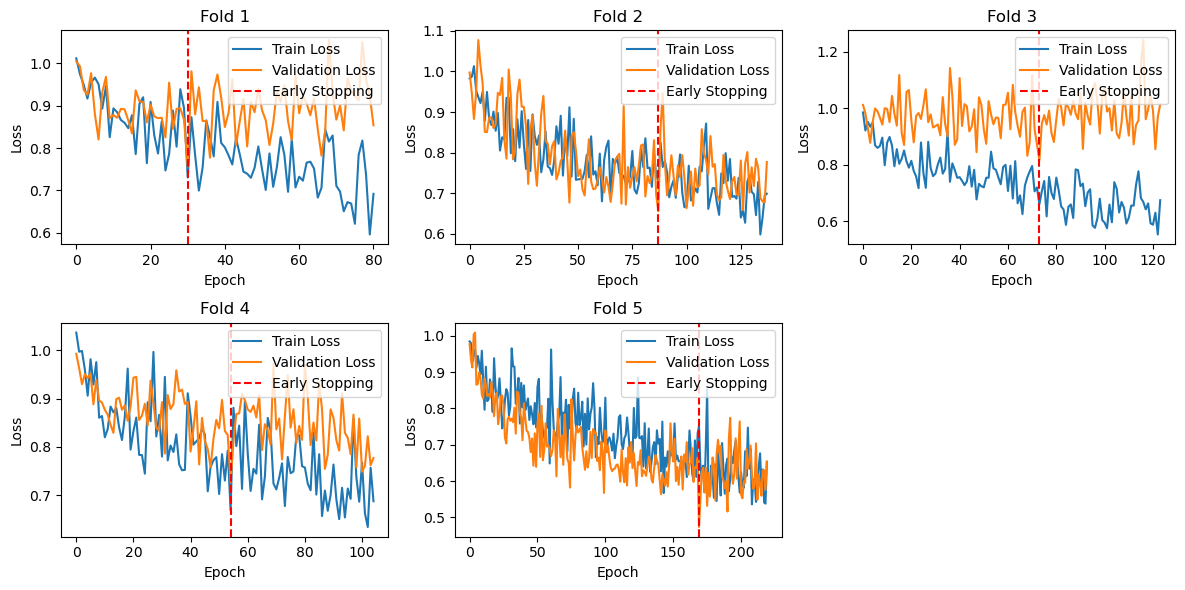

In [9]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [10]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-mallorca-atp-singles',
                                            'past-eastbourne-atp-singles',
                                            'past-wimbledon-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

if len(new_list_vectors_test) == 0:
    print('No data to predict')
    sys.exit(0)

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-eastbourne-atp-singles', 'past-wimbledon-atp-singles', 'past-mallorca-atp-singles'} ...
... loaded 169 matches
Updating id table ...
... id table updated


  0%|          | 0/3 [00:00<?, ?it/s]

Error 'hd68' for match lEdtDsho in tournament past-eastbourne-atp-singles
Error 'n732' for match 0Qq8F8mm in tournament past-eastbourne-atp-singles
Error 's0tx' for match zP7wHGi4 in tournament past-eastbourne-atp-singles
Error 'h0dc' for match 2R5mwx66 in tournament past-eastbourne-atp-singles
Error 'bi23' for match jJ6TEhRi in tournament past-eastbourne-atp-singles
Error 'm0oq' for match 4O199ckC in tournament past-eastbourne-atp-singles
Error 's0re' for match zBOtikZp in tournament past-eastbourne-atp-singles
Error 'ph71' for match dG9yDWe4 in tournament past-eastbourne-atp-singles
Error 'hd68' for match x2T6kBMU in tournament past-eastbourne-atp-singles
Error 's0tx' for match 691k7zH5 in tournament past-eastbourne-atp-singles
Error 'n732' for match 6Tik8VJk in tournament past-eastbourne-atp-singles
Error 'h0dc' for match tKXlZmGq in tournament past-eastbourne-atp-singles
Error 'm0oq' for match SrYtBIHt in tournament past-eastbourne-atp-singles
Error 'o449' for match 0MRXlQjf in tou

 67%|██████▋   | 2/3 [00:00<00:00,  9.95it/s]

Error 'p0ht' for match IHWu47xg in tournament past-wimbledon-atp-singles
Error 'bs86' for match AVaElsed in tournament past-wimbledon-atp-singles
Error 'f840' for match QuotTEBL in tournament past-wimbledon-atp-singles
Error 'mw76' for match YBibIcc3 in tournament past-wimbledon-atp-singles
Error 'ph64' for match 8Sv3Y9m1 in tournament past-wimbledon-atp-singles
Error 'd923' for match xOfcOVO0 in tournament past-wimbledon-atp-singles
Error 'j553' for match pAZuZnwJ in tournament past-wimbledon-atp-singles
Error 'da31' for match bwq6M9gD in tournament past-wimbledon-atp-singles
Error 'j0az' for match K26FsEQE in tournament past-wimbledon-atp-singles
Error 'ki82' for match 2NkxmUJi in tournament past-wimbledon-atp-singles
Error 'gh33' for match Qwr1Cpm3 in tournament past-wimbledon-atp-singles
Error 'h0a4' for match xQZGr0AF in tournament past-wimbledon-atp-singles
Error 'p0hw' for match hjVKLW3e in tournament past-wimbledon-atp-singles
Error 'c0ak' for match WM1w9gKk in tournament past-

100%|██████████| 3/3 [00:00<00:00, 12.39it/s]

Error 'f510' for match bRGqkx0f in tournament past-mallorca-atp-singles
Error 'h997' for match t89ppsM0 in tournament past-mallorca-atp-singles
Error 'j0a4' for match U7E4goaE in tournament past-mallorca-atp-singles
Error 'tb69' for match QuHS9ZyB in tournament past-mallorca-atp-singles
Error 'f510' for match M5gqn3il in tournament past-mallorca-atp-singles
Error 'h0bh' for match UDNJBe7b in tournament past-mallorca-atp-singles
Error 'cd85' for match AobhQfMi in tournament past-mallorca-atp-singles
Error 'j0a4' for match 6H1Yv32e in tournament past-mallorca-atp-singles
Error 'w09e' for match Wz3AkBk3 in tournament past-mallorca-atp-singles
Error 'bo10' for match vVatwsX7 in tournament past-mallorca-atp-singles
Error 's0nv' for match batPmORq in tournament past-mallorca-atp-singles
Error 'cg07' for match pWxHNmhe in tournament past-mallorca-atp-singles
Error 'w09e' for match dlggVvf4 in tournament past-mallorca-atp-singles
Error 'n0dd' for match dCytMzHj in tournament past-mallorca-atp-

  0%|          | 0/17 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 9
Test Loss: for 1 : 0.73
Test Loss: for 2 : 0.60
Test Loss: for 3 : 0.72
Test Loss: for 4 : 0.62
Test Loss: for 5 : 0.68


## Betting

Match : 48ZmFUDj Bautista-Agut R. - Daniel T., bet on player 1 (model pred = 0.85), amount to bet : 4.51, odds : 1.36, label : 1.00, total amount : 101.62
Match : 48ZmFUDj Bautista-Agut R. - Daniel T., no bet on player 2 (model pred =0.03)
Match : EsqAYsjI Monfils G. - Carballes Baena R., no bet on player 1 (model pred =0.70)
Match : EsqAYsjI Monfils G. - Carballes Baena R., no bet on player 2 (model pred =0.10)
Match : KnQZdyOt Giron M. - Cerundolo F., bet on player 1 (model pred = 0.68), amount to bet : 1.64, odds : 1.63, label : 1.00, total amount : 102.66
Match : KnQZdyOt Giron M. - Cerundolo F., no bet on player 2 (model pred =0.11)
Match : IoEzQG7M Kecmanovic M. - Baez S., no bet on player 1 (model pred =0.48)
Match : IoEzQG7M Kecmanovic M. - Baez S., no bet on player 2 (model pred =0.24)
Match : UgZVvnpL Bautista-Agut R. - Humbert U., no bet on player 1 (model pred =0.26)
Match : UgZVvnpL Bautista-Agut R. - Humbert U., no bet on player 2 (model pred =0.45)
Match : zJKuAu4j Manna

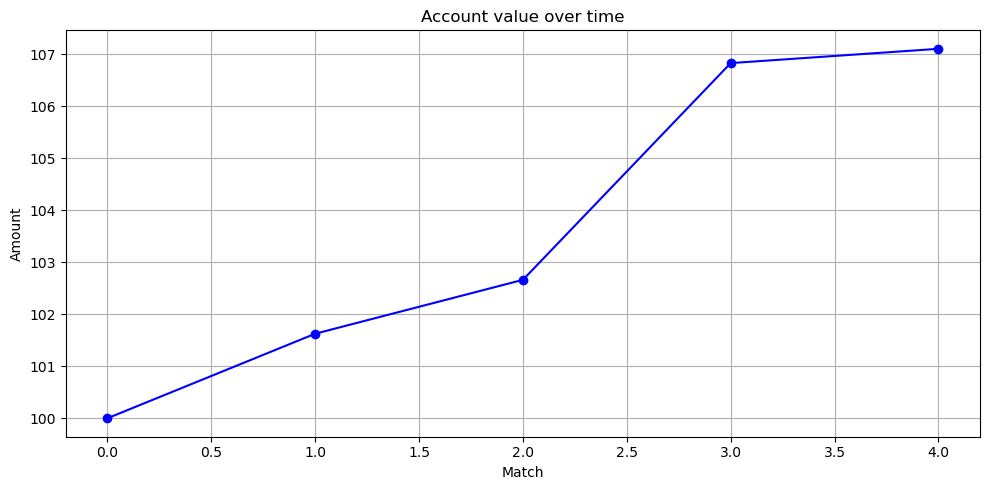

In [11]:
# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds-1)))*safe

test = df.copy()
test['prob_player1'] = ((1+test['predictions'])/2)**1.5
test['prob_player2'] = ((1-test['predictions'])/2)**1.5
# apply keely criterion
test['kelly_criterion_player1'] = test.apply(lambda row : kelly_criterion(row['odds_1'], row['prob_player1']), axis=1)
test['kelly_criterion_player2'] = test.apply(lambda row : kelly_criterion(row['odds_2'], row['prob_player2']), axis=1)

account_values = []

amount = INIT_AMOUNT
account_values.append(amount)
# try the model 
for i, row in test.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    if row['kelly_criterion_player1'] > 0.0 :
        # betting on player 1
        bet = amount * row['kelly_criterion_player1']
        # win or lose
        if row['labels'] == 1:
            amount += bet * (row['odds_1']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred = {row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred ={row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else : 
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 1 (model pred ={row['prob_player1']:.2f})")
    if row['kelly_criterion_player2'] > 0.0 :
        # betting on player 2
        bet = amount * row['kelly_criterion_player2']
        # win or lose
        if row['labels'] == -1:
            amount += bet * (row['odds_2']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else :
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 2 (model pred ={row['prob_player2']:.2f})")
print(f"\nTotal amount after betting : {amount:.2f}")
if amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-amount)/INIT_AMOUNT*100:.2f}%{RESET}")

plt.figure(figsize=(10, 5))
plt.plot(account_values, label='Account value', color='blue', marker='o')
plt.xlabel('Match')
plt.ylabel('Amount')
plt.title('Account value over time')
plt.grid()
plt.tight_layout()
plt.show()
# print the results of the strategy


## Autre

In [12]:
CONFIDENCE_THRESHLOLD = 0.6

# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds)))*safe

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount >= INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : 48ZmFUDj Bautista-Agut R. - Daniel T., bet on player 1 (0.90), amount to bet : 8.28, odds : 1.36, label : 1.00, total amount : 102.98

Total amount after betting : 102.98
Relative won 2.98%
